In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Relação entre os municípios e as regionais 

In [2]:
df_reg_muni = pd.read_csv('regional_to_muni.csv.gz')

df_reg_muni.head()

,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
0,1100189,Rondônia,11002,Cafe,1101,II – CACOAL
1,1100296,Rondônia,11005,Zona Da Mata,1101,II – CACOAL
2,1101476,Rondônia,11002,Cafe,1101,II – CACOAL
3,1301902,Amazonas,13004,Medio Amazonas,1303,LESTE
4,1302702,Amazonas,13003,Rio Madeira,1303,LESTE


In [46]:
df_reg_muni.loc[df_reg_muni.id_regional.isin([41007, 41008, 41009, 41010, 41020])].id_regional.value_counts()

id_regional
41008    27
41010    25
41020    18
41007    15
41009     9
Name: count, dtype: int64

### População: 

Dados do censo de 2022 (disponíveis aqui: https://www.ibge.gov.br/estatisticas/sociais/trabalho/22827-censo-demografi):

In [3]:
df_22 = pd.read_excel('POP2022.xlsx',skiprows = 1, usecols = ['COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO', 'POPULAÇÃO'],
                     dtype = {'COD. UF': str, 'COD. MUNIC':str, 'NOME DO MUNICÍPIO':str}).dropna(how = 'all')

df_22['code_muni'] = df_22['COD. UF'] + df_22['COD. MUNIC']

df_22['code_muni'] = df_22['code_muni'].astype(int)

df_22 = df_22.drop(['COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO'], axis = 1)

#df_22.set_index('code_muni',inplace = True)

df_22 = df_22.rename(columns = {'POPULAÇÃO': 'pop22'})

df_22 = df_22.merge(df_reg_muni, right_on = 'geocodigo', left_on = 'code_muni')
df_22 = df_22.loc[df_22.id_regional.isin([41007, 41008, 41009, 41010, 41020])]

#df_22.pop22 = df_22.pop22.astype(int)
df_22

,pop22,code_muni,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
3922,19506,4101002,4101002,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3923,3107,4101051,4101051,Paraná,41010,10a Rs Cascavel,4108,OESTE
3936,36400,4102000,4102000,Paraná,41020,20a Rs Toledo,4108,OESTE
3942,9886,4102604,4102604,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3944,3416,4102752,4102752,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
...,...,...,...,...,...,...,...,...
4292,11142,4127858,4127858,Paraná,41010,10a Rs Cascavel,4108,OESTE
4295,8088,4127957,4127957,Paraná,41020,20a Rs Toledo,4108,OESTE
4304,9326,4128559,4128559,Paraná,41010,10a Rs Cascavel,4108,OESTE
4305,7929,4128609,4128609,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE


In [4]:
df_22.groupby('id_regional')[['pop22']].sum()

,pop22
id_regional,
41007,287428
41008,371437
41009,445448
41010,581990
41020,425785


In [5]:
df_22.groupby('id_regional')[['pop22']].sum().to_csv('pop_22_region.csv')

### Área

Disponível aqui:  https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15761-areas-dos-municipios.html

In [6]:
df_area = pd.read_excel('area_muni_2023.xls')
df_area.columns = df_area.columns.str.lower()
df_area = df_area.merge(df_reg_muni, right_on = 'geocodigo', left_on = 'cd_mun')
df_area = df_area.loc[df_area.id_regional.isin([41007, 41008, 41009, 41010, 41020])]
df_area.head()

,cd_uf,nm_uf,nm_uf_sigla,cd_mun,nm_mun,ar_mun_2023,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
3922,41,Paraná,PR,4101002.0,Ampére,298.349,4101002,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3923,41,Paraná,PR,4101051.0,Anahy,102.895,4101051,Paraná,41010,10a Rs Cascavel,4108,OESTE
3936,41,Paraná,PR,4102000.0,Assis Chateaubriand,980.727,4102000,Paraná,41020,20a Rs Toledo,4108,OESTE
3942,41,Paraná,PR,4102604.0,Barracão,161.213,4102604,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3944,41,Paraná,PR,4102752.0,Bela Vista da Caroba,148.107,4102752,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE


In [7]:
df_area.groupby('id_regional')[['ar_mun_2023']].sum()

,ar_mun_2023
id_regional,
41007,9258.046
41008,7768.327
41009,4072.678
41010,11775.543
41020,8144.230


In [8]:
df_v = pd.concat([df_22.groupby('id_regional')[['pop22']].sum(), df_area.groupby('id_regional')[['ar_mun_2023']].sum()], axis =1)

df_v['dens'] = df_v['pop22']/df_v['ar_mun_2023']

df_v.head()

,pop22,ar_mun_2023,dens
id_regional,,,
41007,287428,9258.046,31.046292
41008,371437,7768.327,47.814285
41009,445448,4072.678,109.374716
41010,581990,11775.543,49.423623
41020,425785,8144.230,52.280572


### Extração dos centroides a partir dos shapefiles

shapefile dos municípios: 

In [9]:
df_muni = gpd.read_file('BR_municipios.gpkg')

df_muni['codarea'] = df_muni['codarea'].astype(int)

df_muni = df_muni.merge(df_reg_muni, right_on = 'geocodigo', left_on = 'codarea')
df_muni = df_muni.loc[df_muni.id_regional.isin([41007, 41008, 41009, 41010, 41020])]

df_muni.head()

,id,codarea,geometry,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
3922,None,4101002,"POLYGON ((-53.53882 -25.9709, -53.54289 -25.96...",4101002,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3923,None,4101051,"POLYGON ((-53.10708 -24.56961, -53.1058 -24.57...",4101051,Paraná,41010,10a Rs Cascavel,4108,OESTE
3936,None,4102000,"POLYGON ((-53.48109 -24.21811, -53.4783 -24.21...",4102000,Paraná,41020,20a Rs Toledo,4108,OESTE
3942,None,4102604,"POLYGON ((-53.63902 -26.25082, -53.63741 -26.2...",4102604,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE
3944,None,4102752,"POLYGON ((-53.69708 -25.90181, -53.69632 -25.9...",4102752,Paraná,41008,8a Rs Francisco Beltrao,4108,OESTE


shapefile das regionais: 

In [10]:
df = gpd.read_file('shapefile_region.gpkg')

df = df.to_crs("EPSG:4326")

# Calcular centróides
df['longitude'] = df.geometry.centroid.x
df['latitude'] = df.geometry.centroid.y

# Voltar para CRS geográfico, se necessário
df = df.to_crs("EPSG:4326")

df = df.loc[df.code_region.isin([41007,41008, 41009, 41010, 41020])]

df.head()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_6718/2174228725.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_6718/2174228725.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


,code_region,geometry,longitude,latitude
6,41008,"POLYGON ((-53.64248 -26.24401, -53.64409 -26.2...",-53.332178,-25.904713
7,41010,"POLYGON ((-53.4935 -25.53641, -53.49359 -25.54...",-53.271808,-25.058252
14,41020,"POLYGON ((-54.30849 -25.02259, -54.30839 -25.0...",-53.950658,-24.553195
17,41007,"POLYGON ((-52.52849 -26.40019, -52.53162 -26.4...",-52.292336,-26.134867
21,41009,"POLYGON ((-53.92098 -25.5787, -53.92552 -25.57...",-54.204091,-25.339749


Na Figura abaixo cada cor representa os municípios de uma regional, os x representam a localização do centroide da regional e as linhas em pretas as fronteiras entre cada regional de saúde.

In [12]:
df

,code_region,geometry,longitude,latitude
6,41008,"POLYGON ((-53.64248 -26.24401, -53.64409 -26.2...",-53.332178,-25.904713
7,41010,"POLYGON ((-53.4935 -25.53641, -53.49359 -25.54...",-53.271808,-25.058252
14,41020,"POLYGON ((-54.30849 -25.02259, -54.30839 -25.0...",-53.950658,-24.553195
17,41007,"POLYGON ((-52.52849 -26.40019, -52.53162 -26.4...",-52.292336,-26.134867
21,41009,"POLYGON ((-53.92098 -25.5787, -53.92552 -25.57...",-54.204091,-25.339749


In [20]:
c_labels = {41007: 'Pato Branco', 
           41008: 'Francisco Beltrão',
           41009: 'Foz do Iguaçu',
           41010: 'Cascavel',
           41020: 'Toledo'} 

In [21]:
unique_categories = sorted(df['code_region'].unique())

# Define colors manually, mapping each region to a color from tab10
colors = plt.get_cmap('tab10').colors[:len(unique_categories)]
color_map = dict(zip(unique_categories, colors))

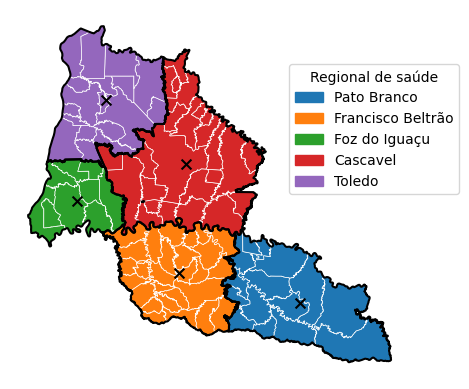

In [43]:
_, ax = plt.subplots()

df.boundary.plot(ax=ax,color = 'black')

#colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'gray']
for reg in [41007, 41008, 41009, 41010, 41020]:
    df_muni.loc[df_muni.id_regional == reg].plot(ax=ax, color = color_map[reg], edgecolor='white', linewidth=0.5)
    
ax.scatter(df['longitude'], df['latitude'], color = 'black', marker = 'x', s = 50)

ax.axis('off')

# Manually add a legend
patches = [mpatches.Patch(color=color_map[cat], label=c_labels[cat]) for cat in unique_categories]
plt.legend(handles=patches, title='Regional de saúde', loc=(0.7,0.5))

plt.savefig('../figures/mapa_regionais.png', dpi = 300, bbox_inches = 'tight')
plt.show()